In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

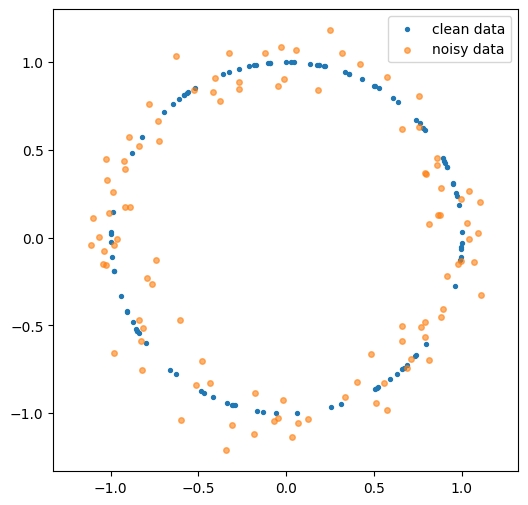

In [2]:
import tadasets # provides functions for generating synthetic topological datasets
np.random.seed(565656)

data_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
data_noisy = tadasets.dsphere(d=1, n=100, noise=0.10)

# data_clean = tadasets.infty_sign(n=100, noise=0.0)
# data_noisy = tadasets.infty_sign(n=100, noise=0.15)

plt.rcParams["figure.figsize"] = (6, 6)
plt.scatter(data_clean[:,0], data_clean[:,1], label="clean data", s=8)
plt.scatter(data_noisy[:,0], data_noisy[:,1], label="noisy data", s=16, alpha=0.6)
plt.axis('equal')
plt.legend()
plt.show()

In [3]:
import ripser # library for computing persistent homology
import persim # tools for visualizing persistence diagrams

def diagram_sizes(dgms):
    '''
    this function calculates and return the sizes of the diagrams in the dgms list
    Input: list dgms
    Output: formatted string representing the sizes of the diagram
    '''
    return ", ".join([f"|$H_{i}$|={len(d)}" for i, d in enumerate(dgms)])

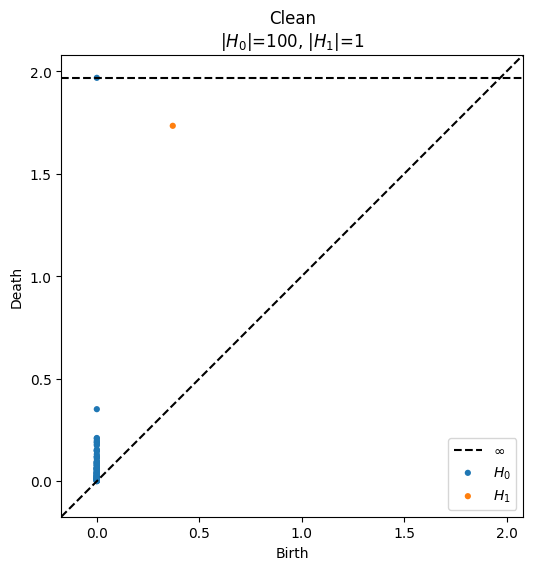

In [4]:
dgm_clean = ripser.ripser(data_clean)['dgms']
persim.plot_diagrams(
    dgm_clean,
    show=True,
    title=f"Clean\n{diagram_sizes(dgm_clean)}"
)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


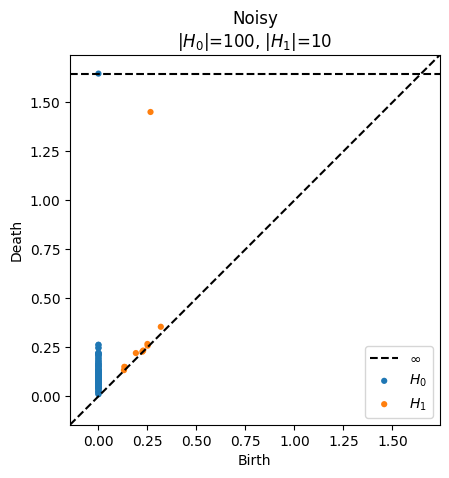

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [5]:
from ripser import Rips
from math import inf # import the variable inf

rips = Rips()
dgm_noisy = rips.transform(data_noisy)
rips.plot(show=True, title=f"Noisy\n{diagram_sizes(dgm_noisy)}")

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm=None, verbose=True)

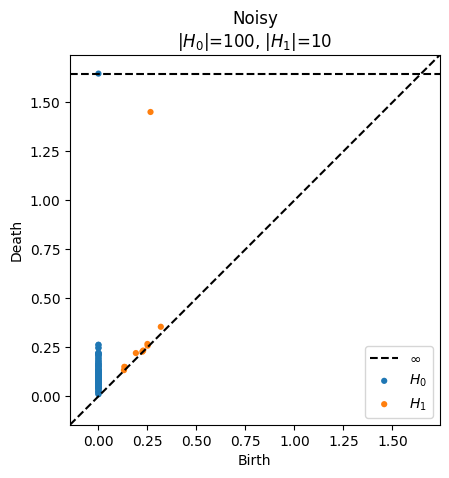

In [6]:
from sklearn.metrics.pairwise import pairwise_distances

D = pairwise_distances(data_noisy, metric='euclidean')

dgm_noisy = ripser.ripser(D, distance_matrix=True)['dgms']
persim.plot_diagrams(
    dgm_noisy, show=True,
    title=f"Noisy\n{diagram_sizes(dgm_noisy)}"
)

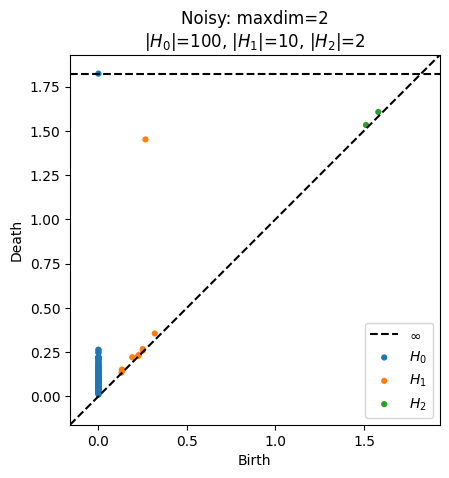

In [7]:
dgm_noisy = ripser.ripser(data_noisy, maxdim=2)['dgms']
persim.plot_diagrams(
    dgm_noisy, show=True,
    title=f"Noisy: maxdim=2\n{diagram_sizes(dgm_noisy)}"
)

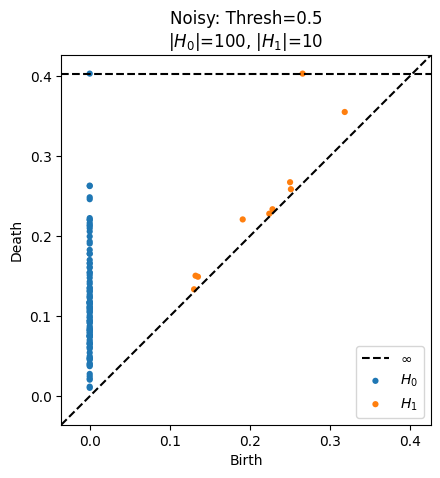

In [8]:
thresh = 0.5
dgm_noisy = ripser.ripser(data_noisy, thresh=thresh)['dgms']
persim.plot_diagrams(
    dgm_noisy, show=True,
    title=f"Noisy: Thresh={thresh}\n{diagram_sizes(dgm_noisy)}"
)

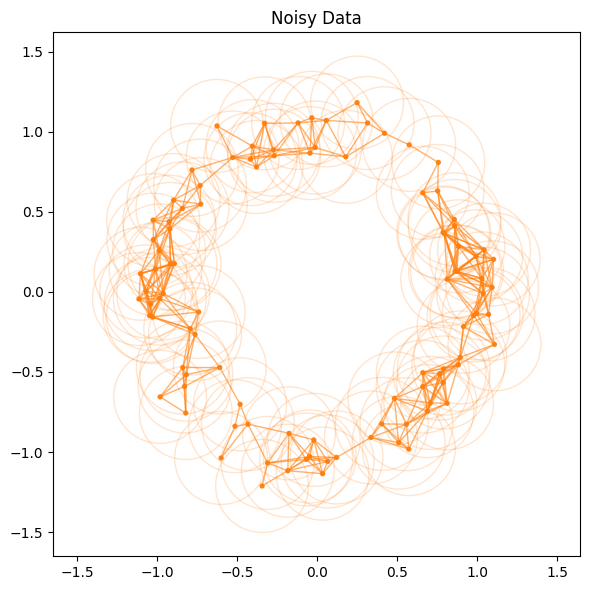

In [9]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib # module to use matplotlib.colormaps

def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = matplotlib.colormaps['tab10'] # get_map() function is deprecated in Matplotlib 3.7

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

plot_rips_complex(data_noisy, R=0.29, label="Noisy Data", maxdim=1)

# get_cmap function in Matplotlib. Starting from Matplotlib version 3.7,
# this function has been deprecated, and you're encouraged to use 
# matplotlib.colormaps[name] or matplotlib.colormaps.get_cmap(obj) instead

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


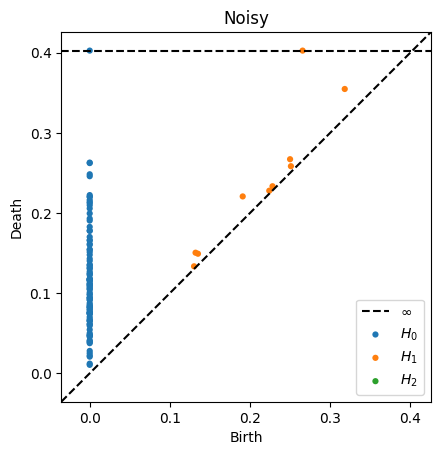

In [10]:
# Ripser's options for the class interface
# When an object of the Rips class is used, the options are set as fields of the ripser object.

rips = Rips()
rips.maxdim = 2
rips.thresh = 0.5
rips.coef = 3
rips.transform(data_noisy)
rips.plot(show=True, title='Noisy') 

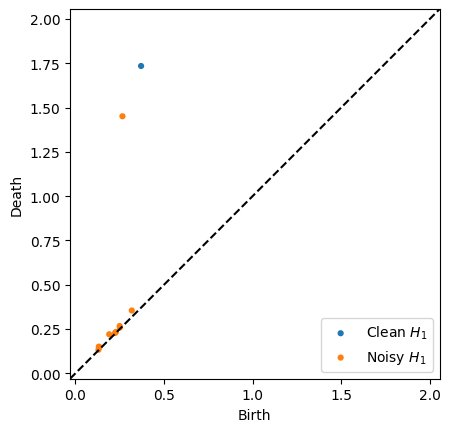

In [11]:
# Plotting options 
# persistence diagrams of different data sets on one plot
# customizing the plot: xy_range, title: str, size: str, lifetime
# persistence images

# PDs of different data sets on one plot

dgms_clean = ripser.ripser(data_clean)['dgms']
dgms_noisy = ripser.ripser(data_noisy, maxdim=2)['dgms']
persim.plot_diagrams(
    [dgms_clean[1], dgms_noisy[1]], 
    labels=['Clean $H_1$', 'Noisy $H_1$'], 
    show=True
)

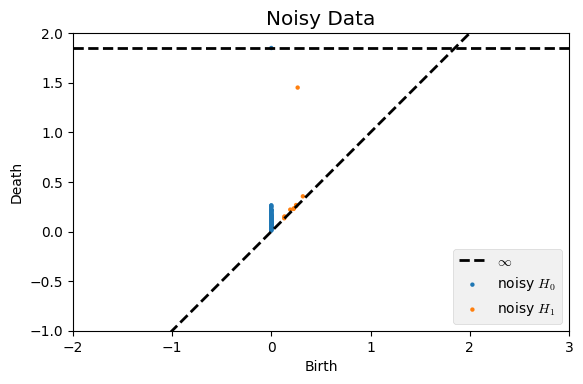

In [12]:
# Customizing plot

persim.plot_diagrams(
    dgms_noisy, 
    title="Noisy Data",
    labels=["noisy $H_0$", "noisy $H_1$"],
    colormap="bmh",
    xy_range=[-2,3, -1, 2],
    size=10,
    diagonal=True,
    show=True
)

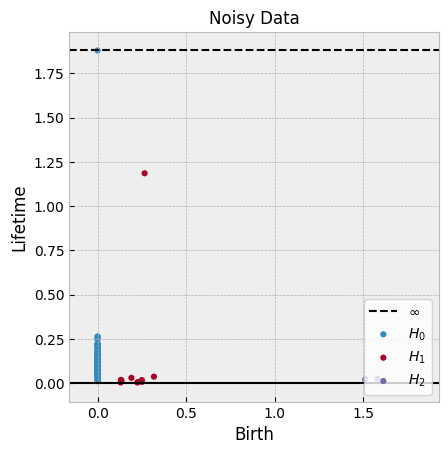

In [13]:
# Lifetime plots

persim.plot_diagrams(
    dgms_noisy, 
    title="Noisy Data",
    lifetime=True,
    show=True
)

<Axes: title={'center': 'Persistence Image'}, xlabel='birth', ylabel='persistence'>

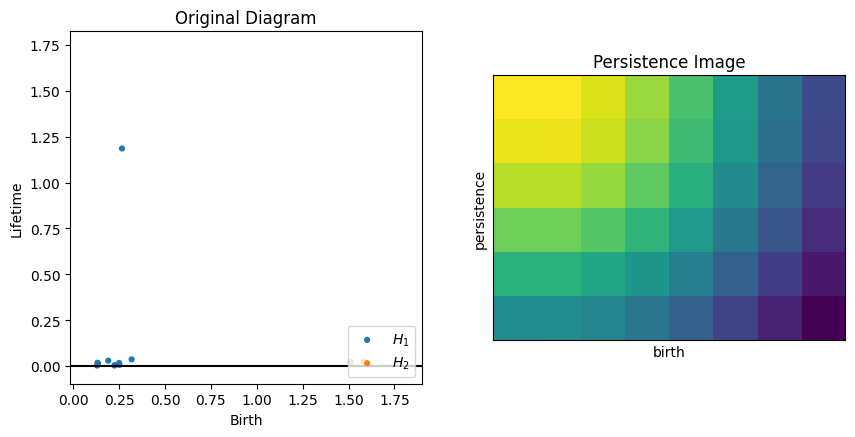

In [14]:
# Persistence images
# The Persim module contains class PersistenceImager that is a transformer which converts persistence diagrams into persistence
#images

from persim import PersistenceImager

pimager = PersistenceImager(pixel_size=0.2)

# The `fit()` method can be called on one or more (*,2) numpy arrays 
# to automatically determine the miniumum birth and persistence ranges needed to capture all persistence pairs. 
# The ranges and resolution are automatically adjusted to accomodate the specified pixel size.
pimager.fit(dgms_noisy[1:3])

# The `transform()` method can then be called on one or more (*,2) numpy arrays 
# to generate persistence images from diagrams.
imgs = pimager.transform(dgms_noisy[1:3])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].set_title("Original Diagram")
persim.plot_diagrams(dgms_noisy[1:3],  lifetime=True, ax=axs[0], labels=["$H_1$", "$H_2$"])

axs[1].set_title("Persistence Image")
pimager.plot_image(imgs[0], ax=axs[1])

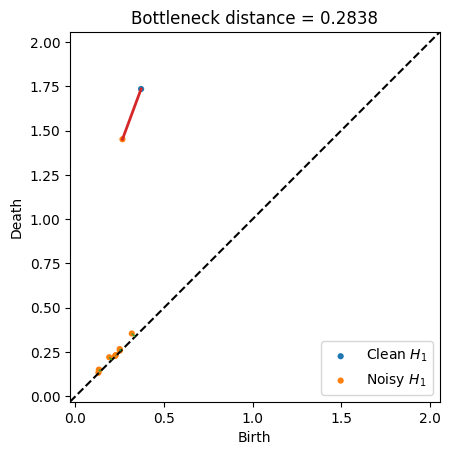

In [15]:
dgm_clean = ripser.ripser(data_clean)['dgms'][1]
dgm_noisy = ripser.ripser(data_noisy)['dgms'][1]

# The bottleneck of the matching is shown as a red line, 
# while the other pairs in the perfect matching which are less than the diagonal are shown as green lines 
# (NOTE: There may be many possible matchings with the minimum bottleneck, and this returns an arbitrary one)
distance_bottleneck, matching = persim.bottleneck(dgm_clean, dgm_noisy, matching=True)
persim.bottleneck_matching(
    dgm_clean, dgm_noisy, matching, 
    labels=['Clean $H_1$', 'Noisy $H_1$']
)
plt.title(f"Bottleneck distance = {distance_bottleneck:0.4f}",)
plt.show()

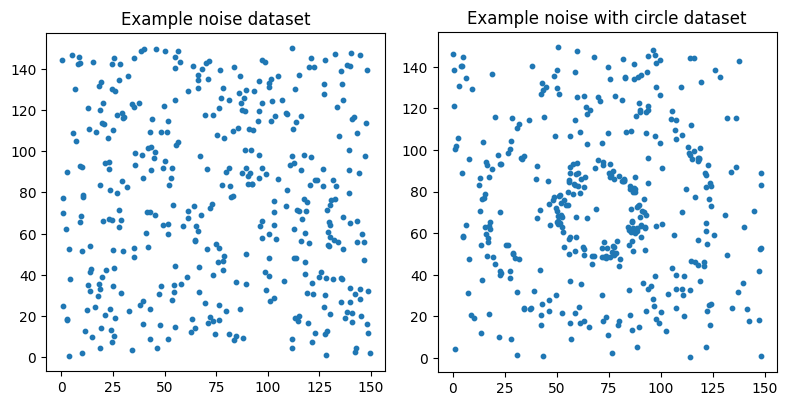

In [16]:
# Data

# We start by generating M point clouds each of size N: half of them are noise, another
# half are noise with circles.

np.random.seed(565656)
M = 50           # total number of samples
m = int(M / 2)   # number of samples per class ('noise'/'circles')
N = 400          # number of points per dataset

def noise(N, scale):
    return scale * np.random.random((N, 2))

def circle(N, scale, offset):
    """Generates two circles with center at `offset` scaled by `scale`"""
    half = int(N/2)
    circ = np.concatenate(
        (tadasets.dsphere(d=1, n=half, r=1.1, noise=0.05),
        tadasets.dsphere(d=1, n=N-half, r=0.4, noise=0.05))
    )
    return offset + scale * circ

# Generate data
just_noise = [noise(N, 150) for _ in range(m)]

half = int(N / 2)
with_circle = [np.concatenate((circle(half, 50, 70), noise(N - half, 150)))
               for _ in range(m)]

datas = []
datas.extend(just_noise)
datas.extend(with_circle)

# Define labels
labels = np.zeros(M)
labels[m:] = 1

# Visualize the data
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(8,4)

xs, ys = just_noise[0][:,0], just_noise[0][:,1]
axs[0].scatter(xs, ys, s=10)
axs[0].set_title("Example noise dataset")
axs[0].set_aspect('equal', 'box')

xs_, ys_ = with_circle[0][:,0], with_circle[0][:,1]
axs[1].scatter(xs_, ys_, s=10)
axs[1].set_title("Example noise with circle dataset")
axs[1].set_aspect('equal', 'box')

fig.tight_layout()

In [ ]:
# Persistence Diagrams

# For each point cloud we generate a H1 persistence diagram

rips = ripser.Rips(maxdim=1, coeff=2)
diagrams_h1 = [rips.fit_transform(data)[1] for data in datas]

plt.figure(figsize=(8,4))

plt.subplot(121)
rips.plot(diagrams_h1[0], show=False, lifetime=True)
plt.title("PD of $H_1$ for just noise")

plt.subplot(122)
rips.plot(diagrams_h1[-1], show=False, lifetime=True)
plt.title("PD of $H_1$ for circle w/ noise")

plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
